In [1]:
import pandas as pd 
import numpy as np

# data pre procesing

In [2]:
data = pd.read_csv('aug_train.csv')
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0


In [3]:
data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [4]:
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000
mean,234392.953477,38.545691,0.998108,26.406867,0.489182,30711.271362,111.939812,154.189429,0.163811
std,139527.487326,15.226897,0.043455,13.181241,0.499884,17061.595532,54.286511,83.735107,0.370104
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,115006.250000,25.000000,1.000000,15.000000,0.000000,24546.000000,26.000000,81.000000,0.000000
50%,230461.500000,36.000000,1.000000,28.000000,0.000000,31692.000000,145.000000,154.000000,0.000000
75%,345434.750000,49.000000,1.000000,35.000000,1.000000,39447.750000,152.000000,227.000000,0.000000
max,508145.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [5]:
data = pd.get_dummies(data,['Gender','Vehicle_Age','Vehicle_Damage'])

In [6]:
data.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
0,167647,22,1,7.0,1,2630.0,152.0,16,0,0,1,0,1,0,1,0
1,17163,42,1,28.0,0,43327.0,26.0,135,0,0,1,1,0,0,0,1
2,32023,66,1,33.0,0,35841.0,124.0,253,0,1,0,1,0,0,0,1
3,87447,22,1,33.0,0,27645.0,152.0,69,0,1,0,0,1,0,1,0
4,501933,28,1,46.0,1,29023.0,152.0,211,0,0,1,0,1,0,1,0


# show imbalanced data set


<AxesSubplot:ylabel='Response'>

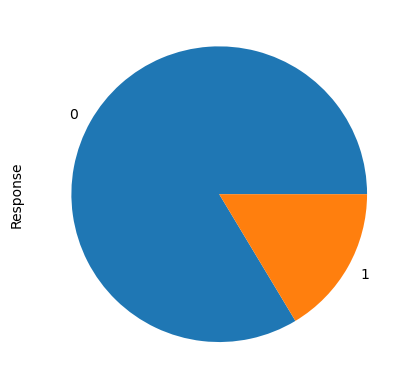

In [7]:
data['Response'].value_counts().plot.pie()

1 is minority 0 is majority

In [8]:
from sklearn.model_selection import train_test_split
x = data.drop(columns=['Age','Response'])
y = data['Response']
X_train , X_test ,y_train , y_test = train_test_split(x,y,random_state=42,stratify=y,test_size=0.3)

learn with imbalanced data

In [9]:
from sklearn.linear_model import LogisticRegression
learn_imbalanced = LogisticRegression()
learn_imbalanced.fit(X_train,y_train)
y_predict_imbalanced =learn_imbalanced.predict(X_test)

In [10]:
y_predict_imbalanced

array([0, 0, 0, ..., 0, 0, 0])

# accuracy imbalanced

In [12]:
from sklearn.metrics import confusion_matrix
cm_imbalanced = confusion_matrix(y_true=y_test,y_pred=y_predict_imbalanced)
cm_imbalanced

array([[94943,   924],
       [18269,   511]])

00 01
10 11

In [13]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision_imbalanced = precision_score(y_test,y_predict_imbalanced)
recall_imbalanced = recall_score(y_test, y_predict_imbalanced)
f1_imbalanced = f1_score(y_test,y_predict_imbalanced)
print(precision_imbalanced)
print(recall_imbalanced)
print(f1_imbalanced)

0.35609756097560974
0.027209797657082
0.050556517437546376


learn imbalanced with decesion tree

In [14]:
from sklearn.tree import DecisionTreeClassifier
learn_imbalanced_tree = DecisionTreeClassifier()
learn_imbalanced_tree.fit(X_train,y_train)
y_predict_tree = learn_imbalanced_tree.predict(X_test)

In [17]:
precision_imbalanced_tree = precision_score(y_test,y_predict_tree)
recall_imbalanced_tree = recall_score(y_test, y_predict_tree)
f1_imbalanced_tree = f1_score(y_test,y_predict_tree)
print(precision_imbalanced_tree)
print(recall_imbalanced_tree)
print(f1_imbalanced_tree)
print(confusion_matrix(y_true=y_test,y_pred=y_predict_tree))

0.5426484206194053
0.5616613418530352
0.5519912083311529
[[86977  8890]
 [ 8232 10548]]


# learn with meta cost

In [18]:
from Meta import MetaCost


In [19]:
cost_matrix = np.array([[0,1000],[10,0]])
cost_matrix

array([[   0, 1000],
       [  10,    0]])

In [20]:
metacost_ = MetaCost(estimator=learn_imbalanced_tree,cost_matrix=cost_matrix,n_estimators=50,n_samples=None,p=True,q=True)

In [21]:
metacost_.fit(X_train,y_train)


resampling data and training ensemble
Finished training ensemble
evaluating optimal class per observation
Finished re-assigning labels
Training model on new data
Finished training model on data with new labels


In [22]:
meta_pred=metacost_.predict(X_test)

/Users/amin/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [23]:
meta_pred.shape

(114647,)

In [24]:
y_test.shape

(114647,)

In [25]:
f1_meta = f1_score(y_test,meta_pred)
f1_meta

0.510357132900276

In [26]:
recall_meta = recall_score(y_test, meta_pred)
recall_meta

0.9747603833865814

In [27]:
precision_meta = precision_score(y_test,meta_pred)
precision_meta

0.345670153706711

In [28]:
cm_meta = confusion_matrix(y_true=y_test,y_pred=meta_pred)
cm_meta

array([[61215, 34652],
       [  474, 18306]])

00   01
10   11